# Assessment 1

To begin this assessment, we first look at our aims. We aim to create a model submission to predict normal vs non-normal traffic and then evaulate our models using a given performance metric. We will be analysing the [KDD99(small, 10%) data set](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html).

Firstly, we install any required libraries.

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import requests
import sklearn.metrics as metrics

%matplotlib inline
mpl.style.use('ggplot')

# Importing KDD Cup Data

Here we import the actual data from the KDD Cup 1999 Data and we aim to use our model on this dataset since. Hopefully later on we will test our model by removing some types of attacks from the dataset and testing to see if our model would of been able to predict them.


In [3]:
df_kdddata = pd.read_csv('https://github.com/Galeforse/DST-Assessment-01/raw/main/Data/KD99_suppliedtestdata.csv.zip')
df_kdddata.head()

/Users/lukehawley/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (25,26,27,29,30,33,35,36,37,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,private,SF,105,146,0.1,0.2,0.3,0.4,...,254,1.00.1,0.01,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
1,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [4]:
#DataFrame with columns
columns = pd.DataFrame(list(df_kdddata.columns.values[1:]))

#DataFrame with data types
data_types = pd.DataFrame(df_kdddata.dtypes, columns=['Data Type'])

#DataFrame with unique values
unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(df_kdddata.columns.values):
    unique_value_counts.loc[v] = [df_kdddata[v].nunique()]

missing_data_counts = pd.DataFrame(df_kdddata.isnull().sum(), columns=['Missing Values'])
kdddata_quality_report = data_types.join(unique_value_counts).join(missing_data_counts)
print('KDD Cup Data Quality Report')
kdddata_quality_report

KDD Cup Data Quality Report


,Data Type,Unique Values,Missing Values
duration,int64,745,0
protocol_type,object,3,0
service,object,65,0
flag,object,11,0
src_bytes,int64,2504,0
dst_bytes,int64,9202,0
land,float64,3,0
wrong_fragment,float64,4,0
urgent,float64,5,0
hot,float64,19,0


# Data Report
Next we can do some exploratory data analysis to help us understand the data more, check for missing data and the different values within the data. We produce the following table:

In [5]:
columns = pd.DataFrame(list(df_kdddata.columns.values[1:]))

data_types = pd.DataFrame(df_kdddata.dtypes, columns=['Data Type'])

unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(df_kdddata.columns.values):
    unique_value_counts.loc[v] = [df_kdddata[v].nunique()]

missing_data_counts = pd.DataFrame(df_kdddata.isnull().sum(), columns=['Missing Values'])
data_quality_report = data_types.join(unique_value_counts).join(missing_data_counts)
print('Data Quality Report')
data_quality_report

Data Quality Report


,Data Type,Unique Values,Missing Values
duration,int64,745,0
protocol_type,object,3,0
service,object,65,0
flag,object,11,0
src_bytes,int64,2504,0
dst_bytes,int64,9202,0
land,float64,3,0
wrong_fragment,float64,4,0
urgent,float64,5,0
hot,float64,19,0


In [21]:
attack = df_kdddata.groupby("label").size().sort_values(ascending=False)
attack = pd.DataFrame(attack)
attack.reset_index(level=0, inplace=True)
attack.columns = ['Attack','Count']
attack

,Attack,Count
0,smurf.,164091
1,normal.,60593
2,neptune.,58001
3,snmpgetattack.,7741
4,mailbomb.,5000
5,guess_passwd.,4367
6,snmpguess.,2406
7,satan.,1633
8,warezmaster.,1602
9,back.,1098


From this we also see how many outputs there are and how frequently they occur. There is a total of 38 outputs where "normal" represents good connections, any other output class represents attacks or bad connections with some happening very infrequently (less than 10 datapoints per class). Combining this with the table below we can see just how imbalanced the dataset is and thus our model will need to be able to classify points belonging to different classes accurately.

When we come to split our data later however, we need at least 2 data points per class and 'imap' only has one so we shall remove it.

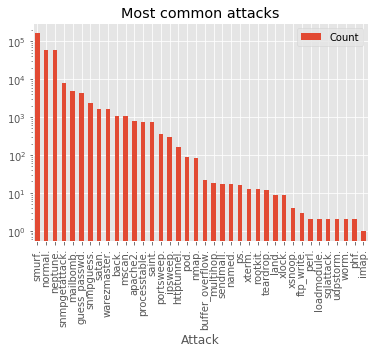

In [7]:
attack.plot.bar(x='Attack', y='Count', logy=True, title='Most common attacks')

In [8]:
describe = df_kdddata.describe()
describe

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate
count,311029.000000,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,...,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,1.731702e+03,7.479937e+02,0.000029,0.000763,0.000052,0.014678,0.002365,0.172478,0.011246,...,4.501188e-07,0.000039,0.002425,269.247019,235.580039,0.059215,0.815654,235.282681,199.193914,0.024953
std,407.644400,1.276567e+05,1.612018e+04,0.005382,0.040369,0.009836,0.312069,0.049998,0.377795,1.958325,...,2.510311e-04,0.006217,0.049177,219.834412,239.308027,0.233873,0.371605,60.913298,100.306470,0.096003
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,17.000000,7.000000,0.000000,1.000000,255.000000,244.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,212.000000,126.000000,0.000000,1.000000,255.000000,255.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,511.000000,511.000000,0.000000,1.000000,255.000000,255.000000,0.010000
max,57715.000000,6.282565e+07,5.203179e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,1.400000e-01,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,255.000000,255.000000,1.000000


# Data preparation

Here we do some univarate and bi-variate analysis to see what basic patterns, if any, can be observed. After this we do some more prep work to our data to make it ready for our model.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text xticklabel objects>)

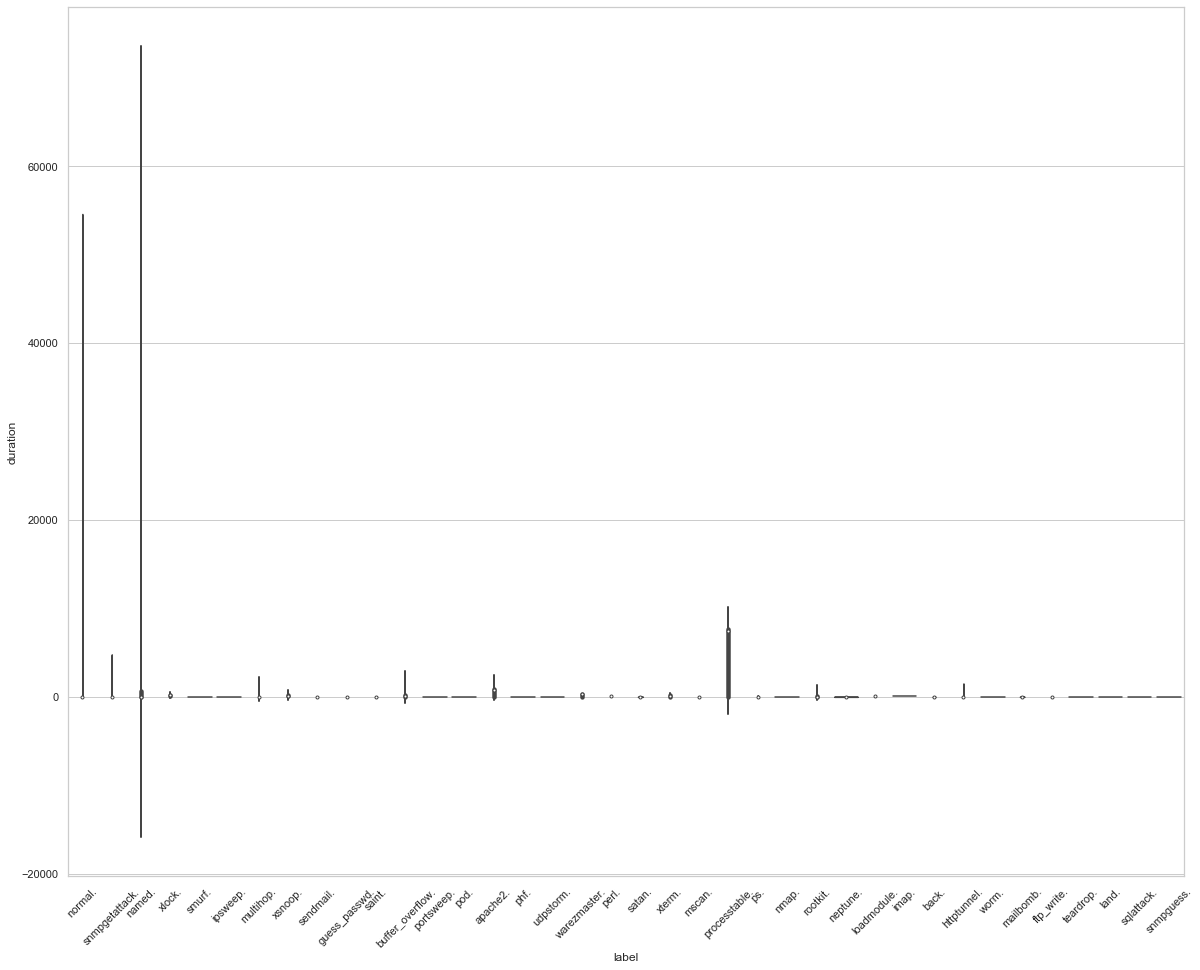

In [10]:
plt.figure(figsize=(20,16))
sns.set(style="whitegrid")
ax = sns.violinplot(x="label", y="duration", data=df_kdddata, fliersize=None, )
plt.xticks(rotation=45)


Here we did univariate analysis on 'Duration' but this hasn't helped us much as there is no clear result from the above table. So we  move onto some bi-variate analysis with the help of pairplots.

In [16]:
def pairplot(df_kdddata, label, features=[]):
    
    sns.pairplot(df_kdddata, hue=label, height=4, diag_kind='hist', vars =features, plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'})

TypeError: 0.0 is not a string

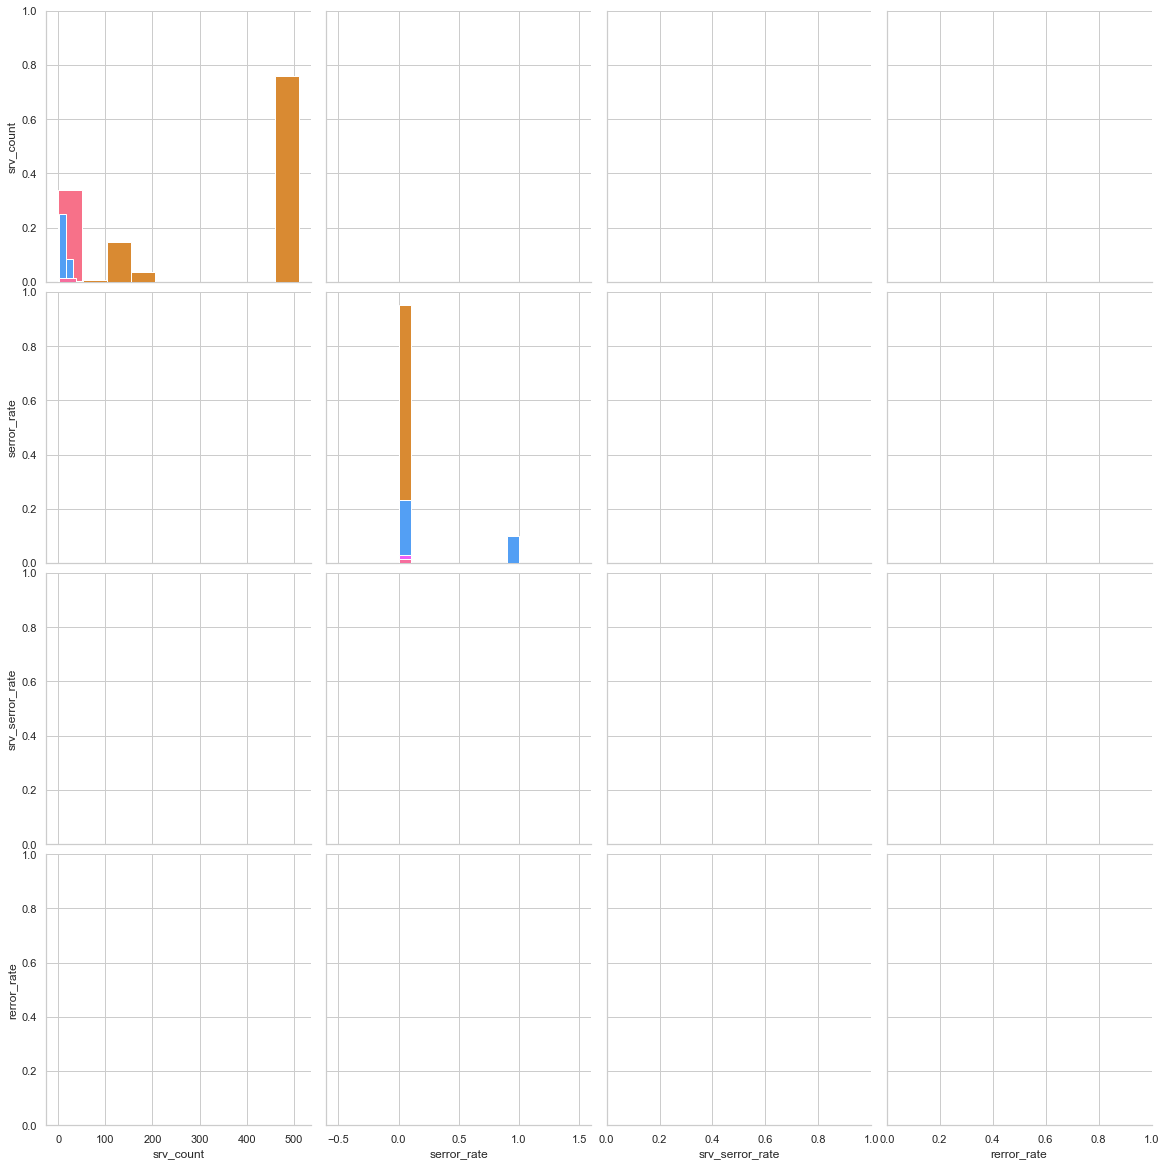

In [17]:
pairplot(df_kdddata, 'label', features = ['srv_count','serror_rate','srv_serror_rate','rerror_rate'])

here we also dont see much blah blah blah


# Obtaining test and training split

In this assessment we will be using k-fold cross validation with our k being equal to 10. This randomly splits the dataset into a 90% training and 10% testing dataset while ensuring every obseration has a chance of occuring in either dataset. 

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_kdddata.drop('label', axis=1), df_kdddata['label'], stratify=df_kdddata['label'], test_size=0.1)

print('Train data')
print(X_train.shape)
print(Y_train.shape)
print('='*20)
print('Test data')
print(X_test.shape)
print(Y_test.shape)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

Now we must convert some of our data into vectors using a method called one-hot encoding which is as follows.

In [18]:
protocol = list(X_train['protocol_type'].values)
protocol = list(set(protocol))
print('Protocol types are:', protocol)


Protocol types are: ['tcp', 'icmp', 'udp']


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(vocabulary=protocol, binary=True)
train_protocol = one_hot.fit_transform(X_train['protocol_type'].values)
test_protocol = one_hot.transform(X_test['protocol_type'].values)

print(train_protocol[1].toarray())
print(train_protocol.shape)

[[0 0 1]]
(444619, 3)


Similarily we do the same to our other categorical columns namely, the 'service' and 'flag' columns.

In [21]:
service = list(X_train['service'].values)
service = list(set(service))

flag = list(X_train['flag'].values)
flag = list(set(flag))
print('Service types are:', service)
print('/'*50)
print('Flag types are:', flag)

Service types are: ['name', 'ftp_data', 'ntp_u', 'sunrpc', 'ftp', 'hostnames', 'pm_dump', 'uucp', 'shell', 'csnet_ns', 'Z39_50', 'klogin', 'printer', 'courier', 'ctf', 'netbios_ns', 'uucp_path', 'efs', 'login', 'daytime', 'remote_job', 'supdup', 'vmnet', 'exec', 'domain_u', 'urp_i', 'X11', 'http_443', 'private', 'discard', 'whois', 'other', 'netbios_ssn', 'time', 'eco_i', 'auth', 'kshell', 'http', 'red_i', 'pop_3', 'domain', 'bgp', 'netstat', 'tim_i', 'sql_net', 'gopher', 'echo', 'link', 'urh_i', 'nnsp', 'nntp', 'ssh', 'telnet', 'IRC', 'rje', 'ecr_i', 'iso_tsap', 'systat', 'finger', 'netbios_dgm', 'smtp', 'pop_2', 'mtp', 'imap4', 'ldap']
//////////////////////////////////////////////////
Flag types are: ['RSTR', 'S3', 'S0', 'REJ', 'RSTOS0', 'S1', 'SF', 'OTH', 'S2', 'SH', 'RSTO']


In [22]:
one_hot = CountVectorizer(vocabulary=service, binary=True)
train_service = one_hot.fit_transform(X_train['service'].values)
test_service = one_hot.transform(X_test['service'].values)

one_hot = CountVectorizer(vocabulary=flag, binary=True)
train_flag = one_hot.fit_transform(X_train['flag'].values)
test_flag = one_hot.transform(X_test['flag'].values)

print(train_service[1].toarray())
print(train_service.shape)
print('/'*50)
print(train_flag[1].toarray())
print(train_flag.shape)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]]
(444619, 65)
//////////////////////////////////////////////////
[[0 0 0 0 0 0 0 0 0 0 0]]
(444619, 11)


Now we have to standardize our data by removing the mean and scaling the unit variance and we use the StandardScaler function from sklearn. This is because there are cases in ML estimators where the estimators provide inaccurate results if the data does not look at least similar to standard normally distrubuted data.

In [23]:
from sklearn.preprocessing import StandardScaler

def feature_scaling(X_train, X_test, feature_name):
    scaler = StandardScaler()
    scaler1 = scaler.fit_transform(X_train[feature_name].values.reshape(-1,1))
    scaler2 = scaler.transform(X_test[feature_name].values.reshape(-1,1))
 
    return scaler1, scaler2

duration1, duration2 = feature_scaling(X_train, X_test, 'duration')
print(duration1[1])

[-0.06733881]


In [26]:
src_bytes1, src_bytes2 = feature_scaling(X_train, X_test, 'src_bytes')
dst_bytes1, dst_bytes2 = feature_scaling(X_train, X_test, 'dst_bytes')
land1, land2 = feature_scaling(X_train, X_test, 'land')
wrong_fragment1, wrong_fragment2 = feature_scaling(X_train, X_test, 'wrong_fragment')
urgent1, urgent2 = feature_scaling(X_train, X_test, 'urgent')
hot1, hot2 = feature_scaling(X_train, X_test, 'hot')
num_failed_logins1, num_failed_logins2 = feature_scaling(X_train, X_test, 'num_failed_logins')
logged_in1, logged_in2 = feature_scaling(X_train, X_test, 'logged_in')
lnum_compromised1, lnum_compromised2 = feature_scaling(X_train, X_test, 'lnum_compromised')
lroot_shell1, lroot_shell2 = feature_scaling(X_train, X_test, 'lroot_shell')
lsu_attempted1, lsu_attempted2 = feature_scaling(X_train, X_test, 'lsu_attempted')
lnum_root1, lnum_root2 = feature_scaling(X_train, X_test, 'lnum_root')
lnum_file_creations1, lnum_file_creations2 = feature_scaling(X_train, X_test, 'lnum_file_creations')
lnum_shells1, lnum_shells2 = feature_scaling(X_train, X_test, 'lnum_shells')
lnum_access_files1, lnum_access_files2 = feature_scaling(X_train, X_test, 'lnum_access_files')
is_host_login1, is_host_login2 = feature_scaling(X_train, X_test, 'is_host_login')
is_guest_login1, is_guest_login2 = feature_scaling(X_train, X_test, 'is_guest_login')
count1, count2 = feature_scaling(X_train, X_test, 'count')
srv_count1, srv_count2 = feature_scaling(X_train, X_test, 'srv_count')
serror_rate1, serror_rate2 = feature_scaling(X_train, X_test, 'serror_rate')
srv_serror_rate1, srv_serror_rate2 = feature_scaling(X_train, X_test, 'srv_serror_rate')
rerror_rate1, rerror_rate2 = feature_scaling(X_train, X_test, 'rerror_rate')
srv_rerror_rate1, srv_rerror_rate2 = feature_scaling(X_train, X_test, 'srv_rerror_rate')
same_srv_rate1, same_srv_rate2 = feature_scaling(X_train, X_test, 'same_srv_rate')
diff_srv_rate1, diff_srv_rate2 = feature_scaling(X_train, X_test, 'diff_srv_rate')
srv_diff_host_rate1, srv_diff_host_rate2 =  feature_scaling(X_train, X_test, 'srv_diff_host_rate')
dst_host_count1, dst_host_count2 =  feature_scaling(df_training, X_test, 'dst_host_count')
dst_host_srv_count1, dst_host_srv_count2 = feature_scaling(X_train, X_test, 'dst_host_srv_count')
dst_host_same_srv_rate1, dst_host_same_srv_rate2 =  feature_scaling(X_train, X_test, 'dst_host_same_srv_rate')
dst_host_diff_srv_rate1, dst_host_diff_srv_rate2 = feature_scaling(X_train, X_test, 'dst_host_diff_srv_rate')
dst_host_same_src_port_rate1, dst_host_same_src_port_rate2 = feature_scaling(X_train, df_test, 'dst_host_same_src_port_rate')
dst_host_srv_diff_host_rate1, dst_host_srv_diff_host_rate2 = feature_scaling(X_train, df_test, 'dst_host_srv_diff_host_rate')
dst_host_serror_rate1, dst_host_serror_rate2 = feature_scaling(X_train, X_test, 'dst_host_serror_rate')
dst_host_srv_serror_rate1, dst_host_srv_serror_rate2 =  feature_scaling(X_train, X_test, 'dst_host_srv_serror_rate')
dst_host_rerror_rate1, dst_host_rerror_rate2 = feature_scaling(X_train, X_test, 'dst_host_rerror_rate')
dst_host_srv_rerror_rate1, dst_host_srv_rerror_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_rerror_rate') 

After performing all the standardizaton we need know we finally join all these features together to form out final dataset ready for our model.

In [33]:
from scipy.sparse import hstack
X_train_1 = hstack((duration1, train_protocol, train_service, train_flag, src_bytes1, dst_bytes1, land1, wrong_fragment1, urgent1, hot1, num_failed_logins1, logged_in1, lnum_compromised1, lroot_shell1, lsu_attempted1, lnum_root1, lnum_file_creations1, lnum_shells1, lnum_access_files1, is_host_login1, is_guest_login1, count1, srv_count1, serror_rate1, srv_serror_rate1, rerror_rate1, srv_rerror_rate1, same_srv_rate1, diff_srv_rate1, srv_diff_host_rate1, dst_host_count1, dst_host_srv_count1, dst_host_same_srv_rate1, dst_host_diff_srv_rate1, dst_host_same_src_port_rate1, dst_host_srv_diff_host_rate1, dst_host_serror_rate1, dst_host_srv_serror_rate1, dst_host_rerror_rate1, dst_host_srv_rerror_rate1))
X_test_1 = hstack((duration2, test_protocol, test_service, test_flag, src_bytes2, dst_bytes2, land2, wrong_fragment2, urgent2, hot2, num_failed_logins2, logged_in2, lnum_compromised2, lroot_shell2, lsu_attempted2, lnum_root2, lnum_file_creations2, lnum_shells2, lnum_access_files2, is_host_login2, is_guest_login2, count2, srv_count2, serror_rate2, srv_serror_rate2, rerror_rate2, srv_rerror_rate2, same_srv_rate2, diff_srv_rate2, srv_diff_host_rate2, dst_host_count2, dst_host_srv_count2, dst_host_same_srv_rate2, dst_host_diff_srv_rate2, dst_host_same_src_port_rate2, dst_host_srv_diff_host_rate2, dst_host_serror_rate2, dst_host_srv_serror_rate2, dst_host_rerror_rate2, dst_host_srv_rerror_rate2))

print(X_train_1.shape)
print(X_test_1.shape)

(444619, 116)
(49402, 116)


# Naive Bayes Classifier

Naive Bayes is a simple probability classifier based off of Bayes Theorem. It's Naive because of the heavy assumptions surronding characteristics of the features namely, that we have independence between all of our features. 

In [ ]:
hyperparameter = {'var_smoothing':[10**x for x in range(-9,3)]}
from sklearn.naive_bayes import Gaussian NB 
nb = GaussianNB()
nb_grid = GridSearchCV(nb, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)
nb_grid_results = model(nb_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)
